In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
df=pd.read_csv("./plant_sensors.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["sensor_id"]=df["sensor_id"].ffill()
df['soil_moisture']=df['soil_moisture'].str.replace(r'\s*%','',regex=True).astype(float)

  sensor_id  number timestamp
0       B-1   69.15       NaT sensor is faulty


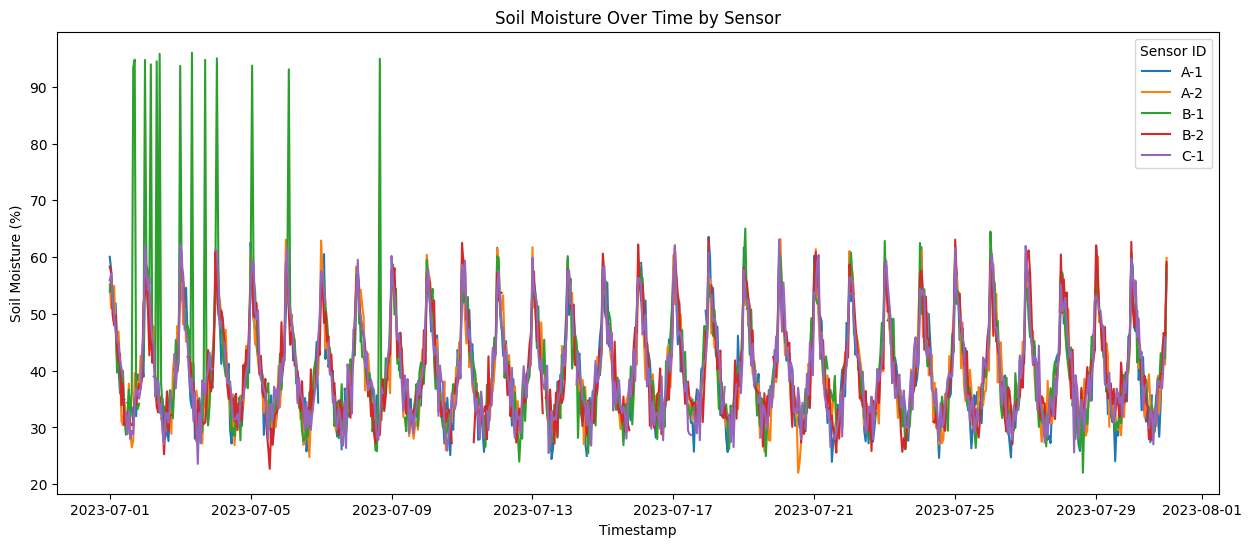

In [199]:
fig,ax=plt.subplots(figsize=(15,6))
# print(df["sensor_id"].unique())
for sensor in df["sensor_id"].unique():
    if sensor is np.nan:
        continue
    sensor_data = df[df["sensor_id"] == sensor]
    sensor_data=sensor_data[["timestamp", "soil_moisture"]]
    #print(sensor_data)
    ax.plot(sensor_data["timestamp"], sensor_data["soil_moisture"], label=sensor)
ax.legend(title="Sensor ID")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Soil Moisture (%)")
ax.set_title("Soil Moisture Over Time by Sensor")
max_mingap = df[["sensor_id","timestamp","soil_moisture"]]
max_mingap = max_mingap.groupby(['sensor_id', df['timestamp'].dt.floor('D')])
max_mingap = max_mingap["soil_moisture"].apply(lambda x: x.max() - x.min()).reset_index(name='max_mingap')
max_mingap = max_mingap.groupby("sensor_id")["max_mingap"].max().reset_index()
rm=pd.DataFrame({"sensor_id":["nan:nan"],"number":[0],"timestamp":[pd.NaT]})
for idx, sensor_row in max_mingap.iterrows():
    rm_number = rm["number"].iloc[0]  # 
    if sensor_row["max_mingap"] > 50 and sensor_row["max_mingap"] > rm_number:
        rm["number"] = rm["number"].astype(float)
        rm.loc[0, "sensor_id"] = sensor_row["sensor_id"]
        rm.loc[0, "number"] = sensor_row["max_mingap"]
#max_mingap=max_mingap.groupby("sensor_id")
print(rm,"sensor is faulty")
# ax.set_xticks([1])
# ax.set_xticklabels(["All Sensors"])
# plt.show()

In [200]:
df['timestamp']=df['timestamp'].interpolate(method='linear')
df['soil_moisture'] = df.groupby(pd.Grouper(key='timestamp', freq='D'))['soil_moisture'].transform(lambda x: x.fillna(x.mean()))
# df.to_csv("sensor.csv",index=False)

In [201]:

Standard_deviation = df.groupby('sensor_id')['soil_moisture'].std()
print(Standard_deviation)

sensor_id
A-1     8.518976
A-2     8.527640
B-1    11.126632
B-2     8.575428
C-1     8.481529
Name: soil_moisture, dtype: float64


In [202]:
print(Standard_deviation.describe())

count     5.000000
mean      9.046041
std       1.163567
min       8.481529
25%       8.518976
50%       8.527640
75%       8.575428
max      11.126632
Name: soil_moisture, dtype: float64


/var/folders/xb/tkf22bzj48n3bjkct_4hbx040000gn/T/ipykernel_33670/1614321781.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=df['sensor_id'].unique())


Text(0.5, 1.0, 'Soil Moisture Over Time by Sensor')

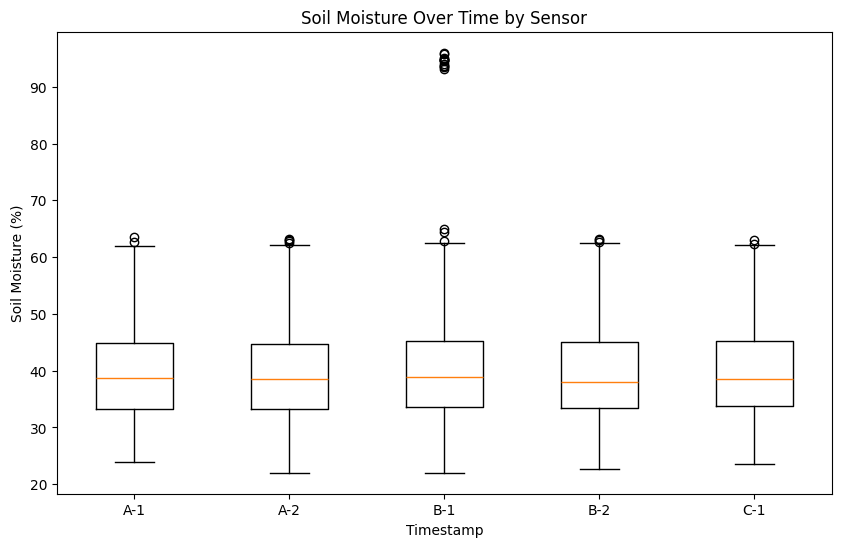

In [203]:
plt.figure(figsize=(10, 6))

data_box = [df[df['sensor_id'] == s]['soil_moisture'] for s in df['sensor_id'].unique()]
plt.boxplot(data_box, labels=df['sensor_id'].unique()) 
plt.xlabel("Timestamp")
plt.ylabel("Soil Moisture (%)")
plt.title("Soil Moisture Over Time by Sensor")